[An example of Partial Least Squares Regression by using sklearn](https://www.geeksforgeeks.org/partial-least-squares-regression-plsregression-using-sklearn/)

PLS as an initial analysis can provide insight into your data and relations
between the explanatory dataset X, the response dataset y and the
observations. Practice using two datasets involving 40 wine samples- the
C dataset has 17 chemical measurements on the wine samples and the X
dataset is NMR data on the same samples. 
> QUESTION: 
1. Can NMR replace the chemical
measures? 
2. Do any of the datasets classify wine color? 

Use the data M3_Wine_Chem.csv and M3_Wine_NMR.csv.
- Preprocess the X and C datasheets.
- Make a PLS plot using X as the explanatory variables and C as the response variables. Color observations by wine type.
- Make Effects Plots to identify specific NMR signals that significantly associate with chemical measures. Present the results in a table and show one example of an Effects
plot. Do these results correspond to the PLS figure?
- Carry out PLSR using PLSRegression, creating a plot of variance explained versus components used. Plot as R2 for both training and test data (using train_test_split).
- Make a prediction plot using y and predicted y. What is the R2 value? How many PCs are predicted to be optimal for the model? Is it a good model?
- Extra analyses might include comparing the PLS plot to a PCA, reorganizing the categories to improve results (hint- it involves wine type) and selecting a subset of X and C variables that improve the model. For the regression analysis, you can include MSE and Q2 calculations in your modeling efforts or try another modeling type, such as PCR.

In [1]:
!pip list

Package                       Version
----------------------------- --------------
aiohappyeyeballs              2.4.0
aiohttp                       3.10.5
aiosignal                     1.3.1
alabaster                     1.0.0
appdirs                       1.4.4
arrow                         1.3.0
astroid                       3.2.4
asttokens                     2.4.1
atomicwrites                  1.4.1
attrs                         24.2.0
autopep8                      2.0.4
Babel                         2.14.0
backports.tarfile             1.0.0
bcrypt                        4.2.0
beautifulsoup4                4.12.3
binaryornot                   0.4.4
biokit                        0.5.0
biopython                     1.84
bioservices                   1.11.2
black                         24.8.0
bleach                        6.1.0
Bottleneck                    1.3.7
Brotli                        1.1.0
cattrs                        24.1.1
certifi                       2024.8.30
cffi   

In [2]:
pip install --upgrade pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.5 MB 9.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.5 MB 9.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.5 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 10.2 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np  

In [10]:
df_chem = pd.read_csv('M3_wine_Chem.csv')
df_NMR = pd.read_csv('M3_wine_NMR.csv')

print(df_chem)
df_chem.info

    Sample  color     Malic    Ethanol   Total  Volatile  Lactic Acid  \
0        1  white  1.659100  13.362000  3.2351  0.201970      0.22088   
1        2    red  0.214060  12.887000  3.4987  0.467540      0.88723   
2        3    red  0.245190  13.044000  3.6213  0.486140      1.35750   
3        4  white  2.256100  11.848000  3.7846  0.227750      0.30157   
4        5    red  0.294230  13.613000  2.9792  0.538590      1.48750   
5        6  white  3.117500  12.018001  3.9126  0.380620      0.26350   
6        7    red  0.070986  13.050000  3.4736  0.555920      1.66410   
7        8   rose  1.262700  12.002000  2.9178  0.186750      0.21736   
8        9    red  0.429280  13.990001  3.6727  0.310760      1.11050   
9       10    red  0.280540  12.111000  3.3800  0.410860      1.50460   
10      11    red  0.246270  12.454000  3.3414  0.413560      1.14390   
11      12  white  1.854200  11.287999  3.1197  0.147150      0.17448   
12      13    red  0.305250  13.509999  3.2791  0.3

<bound method DataFrame.info of     Sample  color     Malic    Ethanol   Total  Volatile  Lactic Acid  \
0        1  white  1.659100  13.362000  3.2351  0.201970      0.22088   
1        2    red  0.214060  12.887000  3.4987  0.467540      0.88723   
2        3    red  0.245190  13.044000  3.6213  0.486140      1.35750   
3        4  white  2.256100  11.848000  3.7846  0.227750      0.30157   
4        5    red  0.294230  13.613000  2.9792  0.538590      1.48750   
5        6  white  3.117500  12.018001  3.9126  0.380620      0.26350   
6        7    red  0.070986  13.050000  3.4736  0.555920      1.66410   
7        8   rose  1.262700  12.002000  2.9178  0.186750      0.21736   
8        9    red  0.429280  13.990001  3.6727  0.310760      1.11050   
9       10    red  0.280540  12.111000  3.3800  0.410860      1.50460   
10      11    red  0.246270  12.454000  3.3414  0.413560      1.14390   
11      12  white  1.854200  11.287999  3.1197  0.147150      0.17448   
12      13    red  

In [12]:
print(df_NMR)
print(df_NMR.shape)


    Sample  color          NMR1          NMR2          NMR3          NMR4  \
0        1  white -35407.609170 -21760.458200  -3991.024100  -8393.990342   
1        2    red  -4012.053611  -5272.839157  -6589.119338  -4820.657009   
2        3    red -11570.148850 -13729.982010 -16034.198700 -16223.831610   
3        4  white -17191.789810  -2467.813447    742.336061  -2161.430539   
4        5    red  -6395.170087  -1441.334574  -3548.368165  -3488.754482   
5        6  white -18881.930650  -7655.419081  -2777.663939  -5255.515046   
6        7    red   1171.438453    197.637033   -951.024100    499.977912   
7        8   rose  -9446.974245  -3304.585189   3488.340979  -2364.783993   
8        9    red  -2432.371071  -2397.918522   3074.372725   4121.565214   
9       10    red  39024.548220   6764.862609   4521.490990   2940.541292   
10      11    red  -3693.198256  -1584.433166  -2563.579432  -2420.585468   
11      12  white -25610.944740 -14873.447250  -7924.706193  -5798.613637   

In [14]:
print(df_chem.describe())


          Sample      Malic    Ethanol      Total   Volatile  Lactic Acid  \
count  40.000000  40.000000  40.000000  40.000000  40.000000    40.000000   
mean   20.500000   0.645126  12.841000   3.530950   0.376054     1.251759   
std    11.690452   0.745290   0.783101   0.361213   0.143016     1.520511   
min     1.000000   0.040000  11.186000   2.868900   0.080426     0.174480   
25%    10.750000   0.180000  12.322500   3.274325   0.260000     0.822500   
50%    20.500000   0.297115  12.843500   3.553850   0.404920     1.078150   
75%    30.250000   0.875000  13.512500   3.717050   0.489605     1.387500   
max    40.000000   3.117500  14.540000   4.663200   0.647610    10.077200   

        Tartaric    Glucose    Density      Folin   Glycerol   Gluconic  \
count  40.000000  40.000000  39.000000  40.000000  40.000000  40.000000   
mean    2.088950   2.337608   0.994935  51.667440   8.202175   0.233103   
std     0.584149   2.132997   0.001557  21.876644   1.601707   1.171891   
min   

In [15]:
print(df_NMR.describe())

          Sample          NMR1          NMR2          NMR3          NMR4  \
count  40.000000  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01   
mean   20.500000 -4.927746e-07  1.239998e-07  7.000003e-08  1.775000e-07   
std    11.690452  1.764354e+04  8.788928e+03  6.693898e+03  7.145026e+03   
min     1.000000 -3.540761e+04 -2.176046e+04 -1.603420e+04 -1.622383e+04   
25%    10.750000 -1.046052e+04 -4.279644e+03 -4.166897e+03 -4.929372e+03   
50%    20.500000 -3.618975e+03 -1.097109e+03  3.059041e+02 -5.104759e+02   
75%    30.250000  7.929900e+03  6.211623e+03  4.760364e+03  4.089318e+03   
max    40.000000  5.823356e+04  1.682233e+04  1.598065e+04  1.985322e+04   

               NMR5          NMR6          NMR7          NMR8          NMR9  \
count  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01  4.000000e+01   
mean  -8.250163e-09  1.425005e-08 -1.199999e-07  5.000004e-08  9.790001e-08   
std    6.389644e+03  6.506071e+03  7.091201e+03  6.562335e+03  7.312446e+03   

# PCA first

How the output should look like: 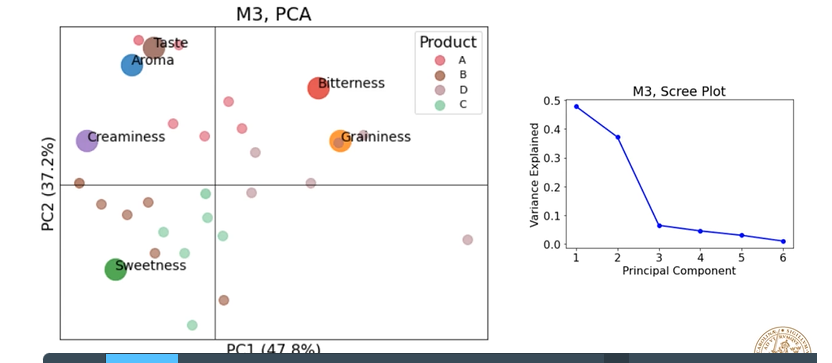

# PLS

1. try to know which are the `indepedent variables` are associated with `dependent variable(s)`, so which are the variables can be used to predict `dependent variable(s)`

